COMMENTS:  Mean score was 8.7/10
3 points for problem 1
2 points for problem 2  - deducted one if you used finite difference rather than gradient
5 points fo rproblem 3  - deducted a few points if the description of results was inadequate

Notebook Assignment 1:
Determine the gradient and Hessian of $f(x) = x^4-5x^2-3x$ and use those two things to 1) identify the extreme points of the function, 2) identify which extreme points are local minima, and 3) identify which extreme point is the global minimum

The derivative of f(x) is 
f'(x) = 4x^3-10x-3
This is the characteristic polynomial of matrix $A = \left[ \begin{array}{ccc} 0 & 1 & 0 \\ 0 & 0 & 1 \\ 0.75 2.5 0 \end{array} \right]$ and whose eigenvalues are the roots of the characteristic polynomial

In [1]:
import numpy as np
from sympy.matrices import Matrix

A = Matrix([[0,1,0],[0,0,1],[.75, 2.5, 0]])
lam = A.eigenvals()
print(lam)



{1.71393943618537: 1, -0.312168188344074: 1, -1.40177124784130: 1}


Part 1a solution
So the extreme points are xa = -1.4018, xb = -0.3122, xc = 1.7139
The Hessian of the function is 
f"(x) = 12 x^2-10
and evaluating f  and f" for the extreme points gives
f"(xa)=13.6>0,       f"(xb)=-8.83<0  ,  f"(xc)=25.25 > 0
f(xa) = 0.206,       f(xb) = 0.556,     f(xc)=-8.26
so xa is a lcoal minimum, xb is a local maximum, and xc=1.7139 is the global minimum.  

PART 2: 
I used the Python library numdifftools to automate the computation of my function's gradient.  The gradient_descent function is given below
and the plot is the time history of the search.   The search converges to the global minimum at 1.7139

1.7139451831013375


Text(0.5, 1.0, 'minimum = 1.71394518')

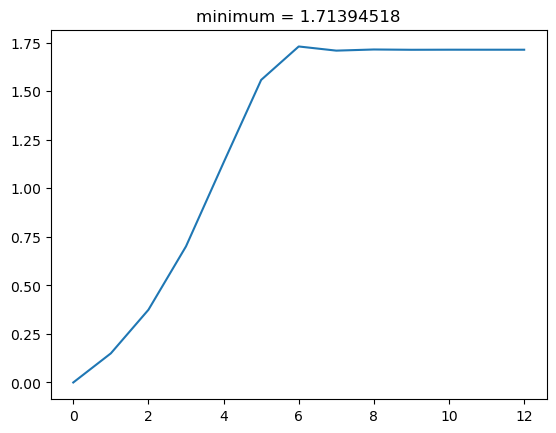

In [2]:
import numpy as np
import numdifftools as nd

def gradient_descent(func, start, learn_rate, n_iter=50, tolerance=1e-6 ):
    vector = start 
    history= [start]
    for _ in range(n_iter):
        diff = -learn_rate * nd.Gradient(myfunc)(vector)
        if np.all(np.abs(diff)<=tolerance):
            break
        vector += diff
        history = np.vstack((history,vector))
    return vector,history

def myfunc(v):
    return v**4-5*v**2-3*v

ans,xhist = gradient_descent(
    myfunc,start=0, learn_rate=0.05, tolerance = 1.e-5
)

print(ans)

import matplotlib.pyplot as plt 
yhist = myfunc(xhist)
plt.plot(np.arange(len(xhist)),xhist)
plt.title("minimum = "+np.array2string(ans))

 

part 3) use the function to generate history plots for learning rates
eta = .05   -> convergence to global minimum
eta = .10   -> oscillates around global minimum
eta = .15   -> converges to local minimum and then oscillates around it
eta = .20   -> oscillates around local minimum
eta = .25   -> diverges

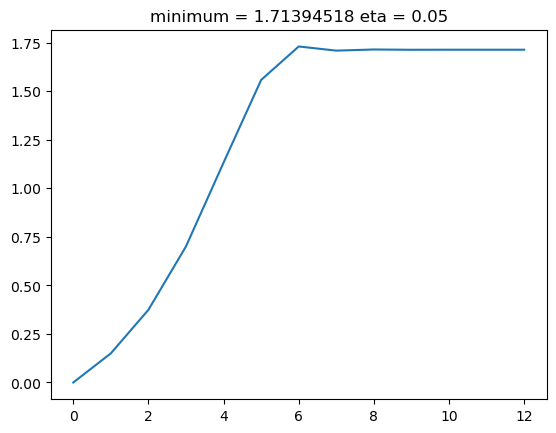

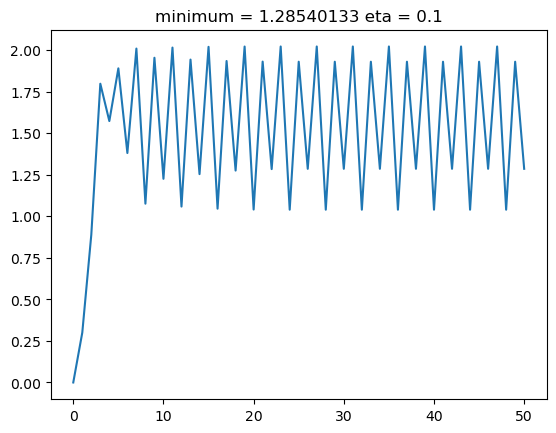

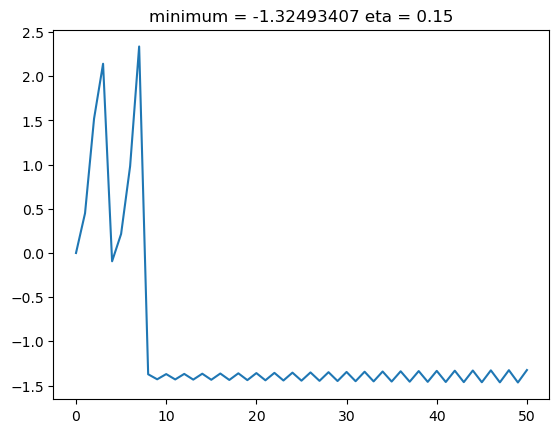

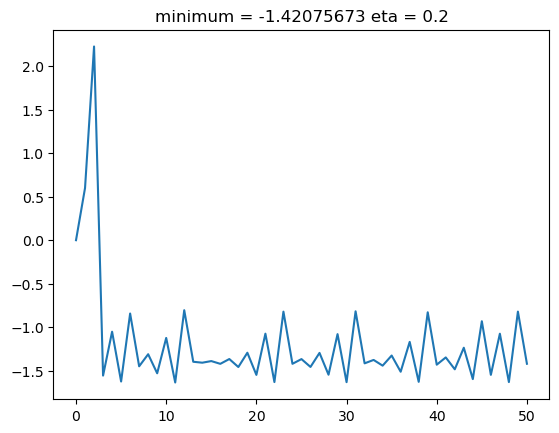

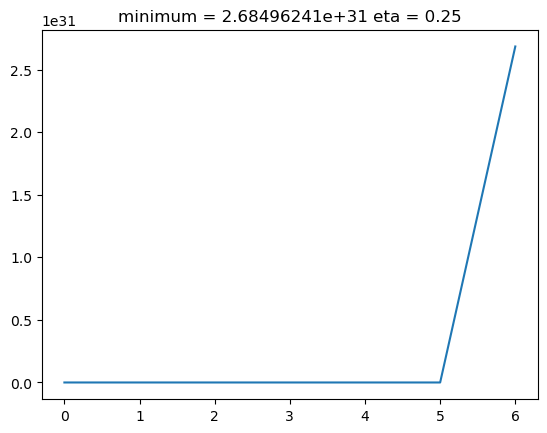

In [3]:
etaTable = np.array([.05, .10, .15, .20, .25])

for eta in np.nditer(etaTable):
    ans,xhist = gradient_descent(
        myfunc,start=0, learn_rate=eta, tolerance = 1.e-5
            )
    import matplotlib.pyplot as plt 
    yhist = myfunc(xhist)
    plt.plot(np.arange(len(xhist)),xhist)
    plt.title("minimum = "+np.array2string(ans)+" eta = " + np.array2string(eta))
    plt.show()



 